In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sfma.api import SFMAModel

## Make Simulations

In [3]:
np.random.seed(1)

In [4]:
n = 100

In [5]:
intercept = 1.5
slope = 5

x_domain = [0, 10]

ineff = 0.4

sample_size_1 = [1000, 0.7]
sample_size_2 = [1000, 0.3]

In [6]:
def frontier(x):
    return np.log(intercept + slope * x)

In [7]:
def simulate():
    x = np.random.uniform(low=x_domain[0], high=x_domain[1], size=n)
    sample_sizes_1 = np.random.negative_binomial(
        n=sample_size_1[0], p=sample_size_1[1], size=int(n / 2)
    )
    sample_sizes_2 = np.random.negative_binomial(
        n=sample_size_2[0], p=sample_size_2[1], size=int(n / 2)
    )
    sample_sizes = np.append(sample_sizes_1, sample_sizes_2)
    
    the_frontier = frontier(x)
    inefficiency = np.random.exponential(ineff, size=n)
    means = the_frontier - inefficiency
    samples = [np.random.normal(m, scale=4, size=s) for m, s in zip(means, sample_sizes)]
    est_means = np.array([np.mean(s) for s in samples])
    est_sterr = np.array([np.sqrt(np.sum(sum((s - np.mean(s))**2)) / ((len(s) - 1)))/np.sqrt(len(s)) for s in samples])
    df = pd.DataFrame({
        'output': est_means,
        'se': est_sterr,
        'input': x,
        'ones': np.ones(len(x)),
        'frontier': the_frontier,
        'truth': means,
        'sample_size': sample_sizes
    })
    return df

In [70]:
sim = simulate()

In [71]:
the_frontier = sim['frontier']
linspace = np.linspace(x_domain[0], x_domain[1])
front = frontier(linspace)

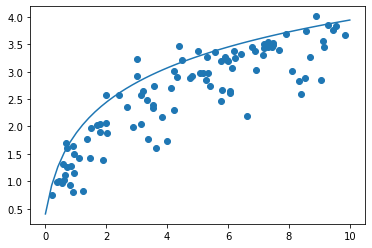

In [72]:
plt.plot(linspace, front, linestyle='solid')
plt.scatter(sim.input, sim.output)

<ErrorbarContainer object of 3 artists>

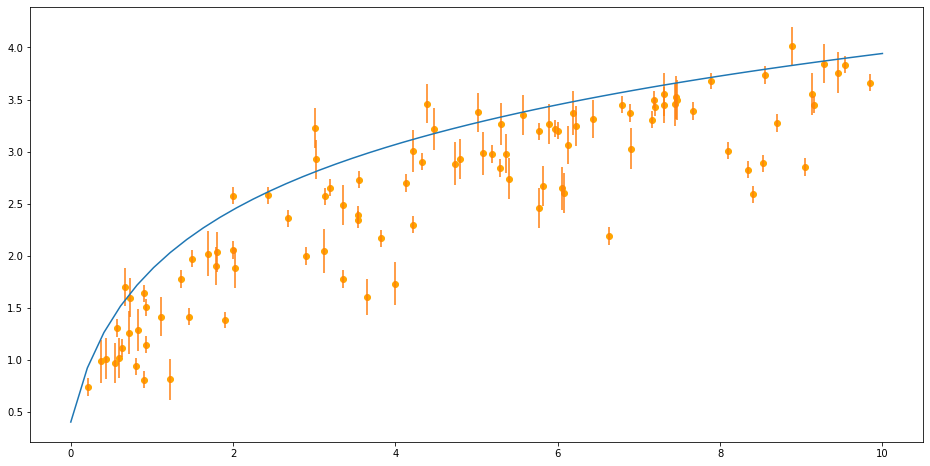

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(linspace, front, linestyle='solid')
ax.scatter(sim.input, sim.output, color='orange')
ax.errorbar(sim.input, sim.output, yerr=sim.se, linestyle='None')

In [74]:
model = SFMAModel(
    df=sim,
    col_output='output',
    col_se='se',
    col_input='input',
    include_gamma=True
)
# no_se_model = SFMAModel(
#     df=sim,
#     col_output='output',
#     col_se='ones',
#     col_input='input',
#     include_gamma=True
# )
# lin_tails = SFMAModel(
#     df=sim,
#     col_output='output',
#     col_se='se',
#     col_input='input',
#     r_linear=True,
#     include_gamma=True
# )
# concave = SFMAModel(
#     df=sim,
#     col_output='output',
#     col_se='se',
#     col_input='input',
#     r_linear=True,
#     concave=True,
#     include_gamma=True
# )

In [75]:
model.fit(options={'solver_options': {}})
# no_se_model.fit(options={'solver_options': {'method': 'trust-constr'}})
# lin_tails.fit(options={'solver_options': {}})
# concave.fit(options={'solver_options': {}})

/Users/marlena/repos/SFMA/src/sfma/models/marginal.py:150: RuntimeWarning: divide by zero encountered in double_scalars
  grad[-1] += -dlerf[i] * r[i] / np.sqrt(2) * v_roe[i]**(-1/2) * 1/2 / v[i] * (np.sqrt(v[i] / v_ie[i]) - np.sqrt(v_ie[i] / v[i]))
/Users/marlena/repos/SFMA/src/sfma/models/marginal.py:150: RuntimeWarning: invalid value encountered in double_scalars
  grad[-1] += -dlerf[i] * r[i] / np.sqrt(2) * v_roe[i]**(-1/2) * 1/2 / v[i] * (np.sqrt(v[i] / v_ie[i]) - np.sqrt(v_ie[i] / v[i]))


In [76]:
sim['base_predictions'] = model.predict()
#sim['no_se_predictions'] = no_se_model.predict()
#sim['linear_tail_predictions'] = lin_tails.predict()
#sim['concave_predictions'] = concave.predict()
sim.sort_values('input', inplace=True)

In [77]:
model.solver.x_opt

array([0.64699907, 1.98374702, 2.25867868, 3.61356928, 2.91205159,
       3.76123938, 0.93167123, 0.36684897])

In [78]:
model.solver.result

      fun: -0.11081745481743215
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.05793165, -0.07944639, -0.11015203, -0.11201007, -0.07104627,
       -0.03183191,  0.30613597,  0.37768476])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 9
      nit: 1
     njev: 9
   status: 2
  success: False
        x: array([0.64699907, 1.98374702, 2.25867868, 3.61356928, 2.91205159,
       3.76123938, 0.93167123, 0.36684897])

In [79]:
lin_tails.inefficiencies

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

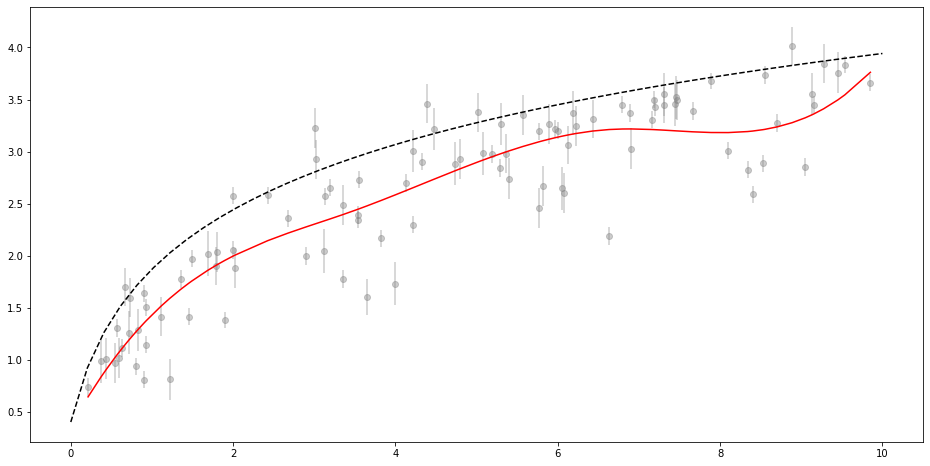

In [80]:
fig, axes = plt.subplots(1, 1, figsize=(16, 8))
axes.plot(linspace, front, linestyle='dashed', color='black')
axes.scatter(sim.input, sim.output, color='grey', alpha=0.4)
axes.errorbar(sim.input, sim.output, yerr=sim.se, linestyle='None', color='grey', alpha=0.4)
axes.plot(sim.input, sim.base_predictions, color='red')
# axes.plot(sim.input, sim.no_se_predictions, color='blue')
# axes.plot(sim.input, sim.linear_tail_predictions, color='purple')
# axes.plot(sim.input, sim.concave_predictions, color='green')

## Simulations

In [63]:
num_simulations = 10

In [33]:
sim_dfs = []
for i in range(num_simulations):
    sim_i = simulate()
    model = SFMAModel(
        df=sim_i,
        col_output='output',
        col_se='se',
        col_input='input',
    )
    no_se_model = SFMAModel(
        df=sim_i,
        col_output='output',
        col_se='ones',
        col_input='input'
    )
    lin_tails = SFMAModel(
        df=sim_i,
        col_output='output',
        col_se='se',
        col_input='input',
        r_linear=True
    )
    model.fit()
    no_se_model.fit()
    lin_tails.fit()
    sim_i['base_predictions'] = model.predict()
    sim_i['no_se_predictions'] = no_se_model.predict()
    sim_i['linear_tail_predictions'] = lin_tails.predict()
    sim_i.sort_values('input', inplace=True)
    sim_dfs.append(sim_i)

/Users/marlena/repos/SFMA/src/sfma/models/marginal.py:31: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(eta) * r / np.sqrt(2 * V * (gamma + data.sigma2))


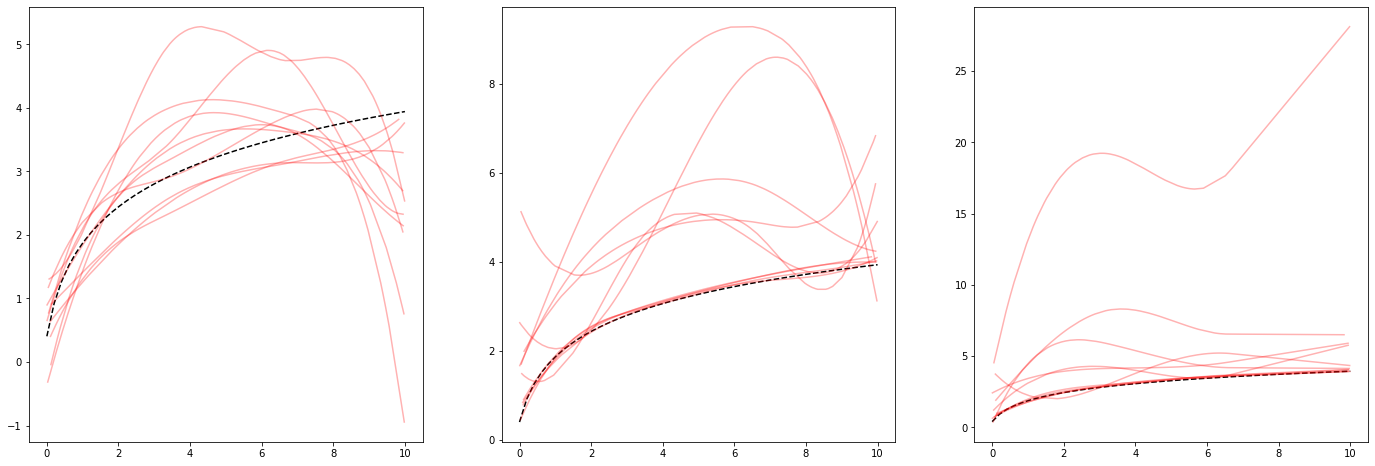

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
for i, kind in enumerate(['no_se_predictions',
                         'base_predictions',
                         'linear_tail_predictions']):
    axes[i].plot(linspace, front, linestyle='dashed', color='black')
    for df in sim_dfs:
        axes[i].plot(df.input, df[kind], color='red', alpha=0.3)